# WEATHER ANALYSIS

The project contains a 10-year weather dataset of a town in Hungary. We will analyze it and create several regression models as well as ARIMA models for weather forecasting.

In [1]:
#Install and load all the necessary packages
install.packages('ggthemes')
install.packages('ggfortify')
install.packages('corrplot')
install.packages('astsa')
suppressPackageStartupMessages(library(astsa))
suppressPackageStartupMessages(library(ggthemes))
suppressPackageStartupMessages(library(broom))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(lubridate))
suppressPackageStartupMessages(library(ggfortify)) 
suppressPackageStartupMessages(library(corrplot))
#Read the file
weatherdata = read.csv('D:/2020/Git/weatherHistory.csv')
#Display first 6 rows of the dataset
head(weatherdata)

package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kartik\AppData\Local\Temp\RtmpuwXAWN\downloaded_packages


also installing the dependency 'gridExtra'



package 'gridExtra' successfully unpacked and MD5 sums checked
package 'ggfortify' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kartik\AppData\Local\Temp\RtmpuwXAWN\downloaded_packages
package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kartik\AppData\Local\Temp\RtmpuwXAWN\downloaded_packages
package 'astsa' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kartik\AppData\Local\Temp\RtmpuwXAWN\downloaded_packages


Warning message in install.packages("https://cran.r-project.org/src/contrib/Archive/rlang/rlang_0.4.5.tar.gz", :
"installation of package 'C:/Users/Kartik/AppData/Local/Temp/RtmpuwXAWN/downloaded_packages/rlang_0.4.5.tar.gz' had non-zero exit status"Warning message:
"package 'astsa' was built under R version 3.6.3"Warning message:
"package 'ggthemes' was built under R version 3.6.3"Warning message:
"package 'ggfortify' was built under R version 3.6.3"Warning message:
"package 'corrplot' was built under R version 3.6.3"

Formatted.Date,Summary,Precip.Type,Temperature..C.,Apparent.Temperature..C.,Humidity,Wind.Speed..km.h.,Wind.Bearing..degrees.,Visibility..km.,Loud.Cover,Pressure..millibars.,Daily.Summary
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,0,1016.66,Partly cloudy throughout the day.


As the dataset has been loaded and all the necessary packages have also been imported, we can begin our analysis. Firstly, let us see if any of the fields of the data are related to each other. We will first use the correlation function to analyze the numerical data.

,Temperature..C.,Apparent.Temperature..C.,Humidity,Wind.Speed..km.h.,Wind.Bearing..degrees.,Visibility..km.,Pressure..millibars.
Temperature..C.,1.000000000,0.99262856,-0.6322546750,0.008956968,0.0299882045,0.39284657,-0.0054471062
Apparent.Temperature..C.,0.992628564,1.00000000,-0.6025709956,-0.056649698,0.0290305198,0.38171847,-0.0002189998
Humidity,-0.632254675,-0.60257100,1.0000000000,-0.224951456,0.0007346454,-0.36917250,0.0054542633
Wind.Speed..km.h.,0.008956968,-0.05664970,-0.2249514559,1.000000000,0.1038215077,0.10074928,-0.0492628055
Wind.Bearing..degrees.,0.029988204,0.02903052,0.0007346454,0.103821508,1.0000000000,0.04759418,-0.0116508848
Visibility..km.,0.392846572,0.38171847,-0.3691725006,0.100749284,0.0475941753,1.00000000,0.0598183810


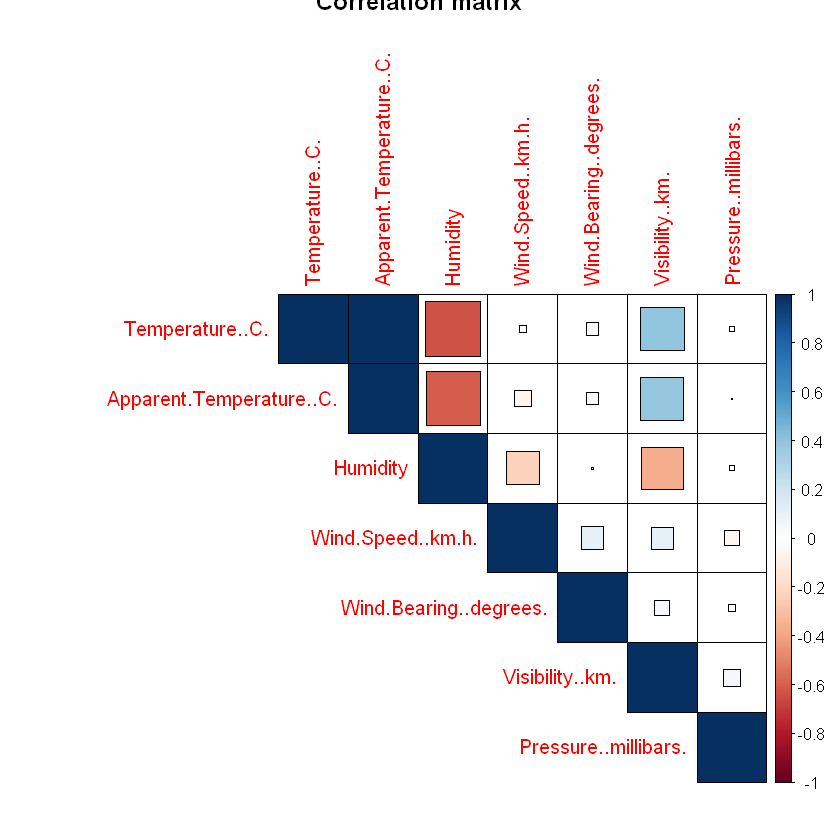

In [2]:
#Use cor() to see any mathematcial relation
relation <- cor(weatherdata[c(4,5,6,7,8,9,11)])
#Display all the relation between our data
head(relation)
#Plotting the relation dataset into a corelation matrix and display a heatmap
corrplot(relation, na.label = "?", outline = T, addgrid.col = T, method = 'square',
         title = 'Correlation matrix', type = 'upper')

Upon careful evaluation of the correlation matrix, we can see that temperature and humidity have a negative correlation of -0.63. So we will create models to analyze this relationship. We will plot the precipitation type against temperature and also analyze the humidity level. Next a logistic model is also created to determine the type of precipitation based upon the temperature of Hungary in 2006. 

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

(Intercept) Temperature..C. 
       7.900786    -2546.868918

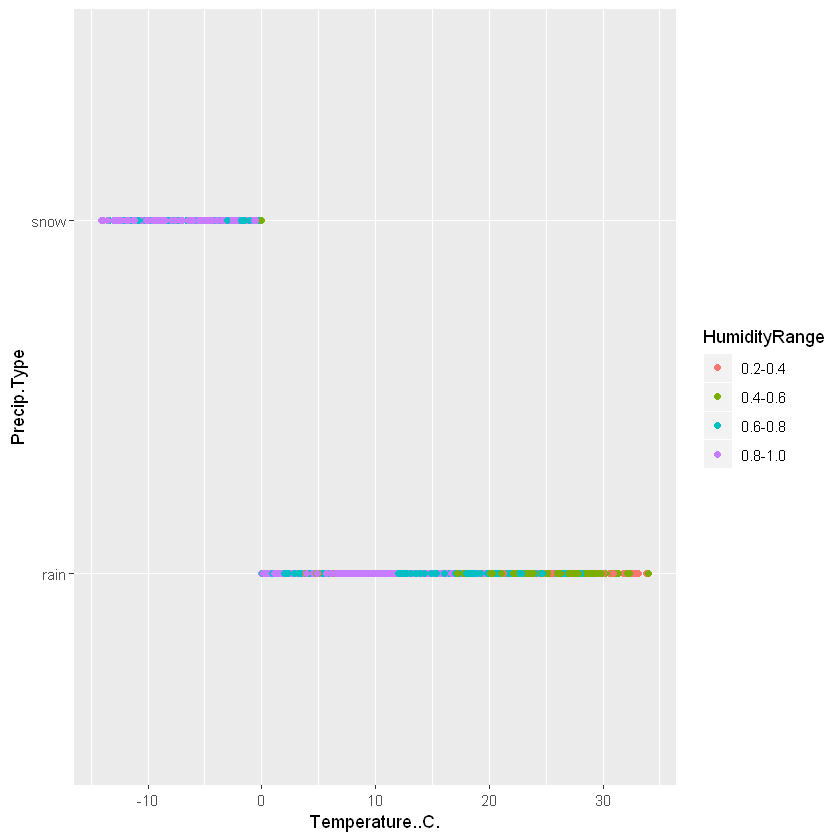

In [24]:
#Creating a date-time column for all the dates
weatherdata$Date <- ymd_hms(weatherdata$Formatted.Date )
#Dividing humidity in several groups
weatherdata$HumidityRange <- cut(weatherdata$Humidity, breaks = seq(0,1,0.2), labels =
                            c("less than 0.2" , "0.2-0.4" , "0.4-0.6" , "0.6-0.8" , "0.8-1.0"))
#Getting the weather data for 2006 
weatherdata2006 <- subset(weatherdata, subset = year(weatherdata$Date) == 2006)
#Creating a logistic model predicting the type of precipitation
logistic_model1 <- glm(Precip.Type ~ Temperature..C., data = weatherdata2006, family = 'binomial')

ggplot(weatherdata2006, aes(Temperature..C., Precip.Type)) +                          #Adding a plot
    geom_point(aes(color = HumidityRange))                                          #Adding points
    
    
#Displaying our model
coefficients(logistic_model1)

Let us create a linear regression model for humidity based upon several factors such as Temperature and Wind Speed.  

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.5043367,0.5041876,0.1376401,3383.113,0,30,54431.34,-108800.7,-108506.9,1826.713,96423


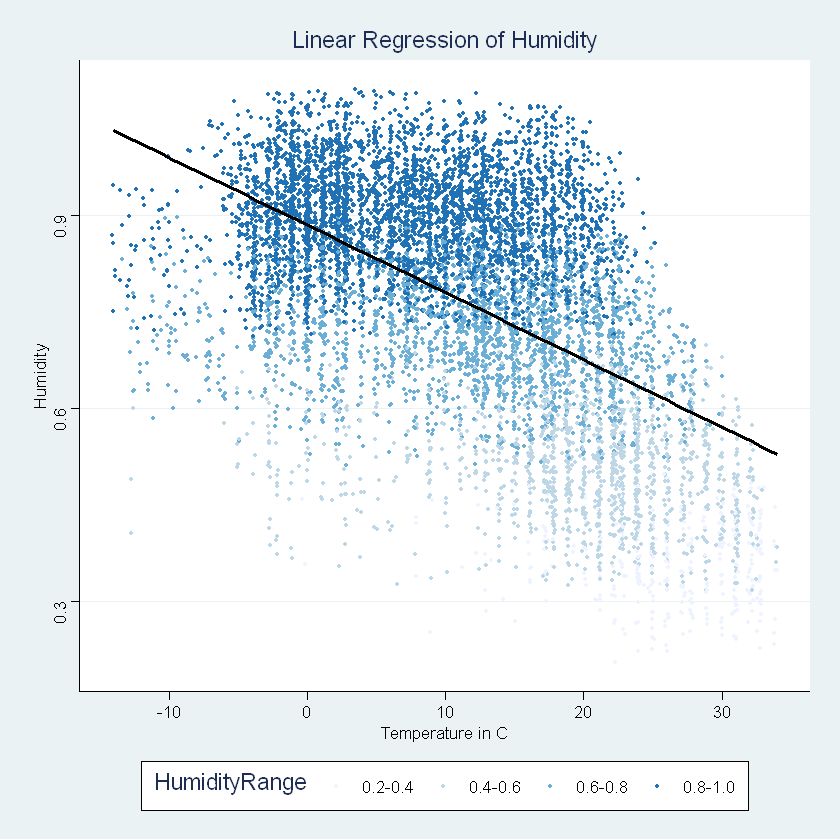

In [4]:
#Plotting humidity with respect to temperature
ggplot(weatherdata2006, aes(Temperature..C., Humidity)) + 
    geom_point( position = position_jitter(width = 0.05, height = 0.10), aes(color = HumidityRange), size = 0.8) +
    geom_smooth(se = FALSE, color = 'black', method = 'lm') +
    labs(x = "Temperature in C" , fill = "Humidity Range", title = "Linear Regression of Humidity") + 
    theme_stata() + scale_color_brewer()


#Creating a linear model to explain humidity level based on Temperature,Wind Speed and Summary column of the dataset
linear_model1 <- lm(Humidity~Temperature..C. + Wind.Speed..km.h. + Apparent.Temperature..C. + Summary, data = weatherdata)
#Have a glance at the model created
glance(linear_model1)

We will now plot average monthly temperature from 2006 to 2016 and plot a linear model displaying average annual temperature in a red coloured line.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


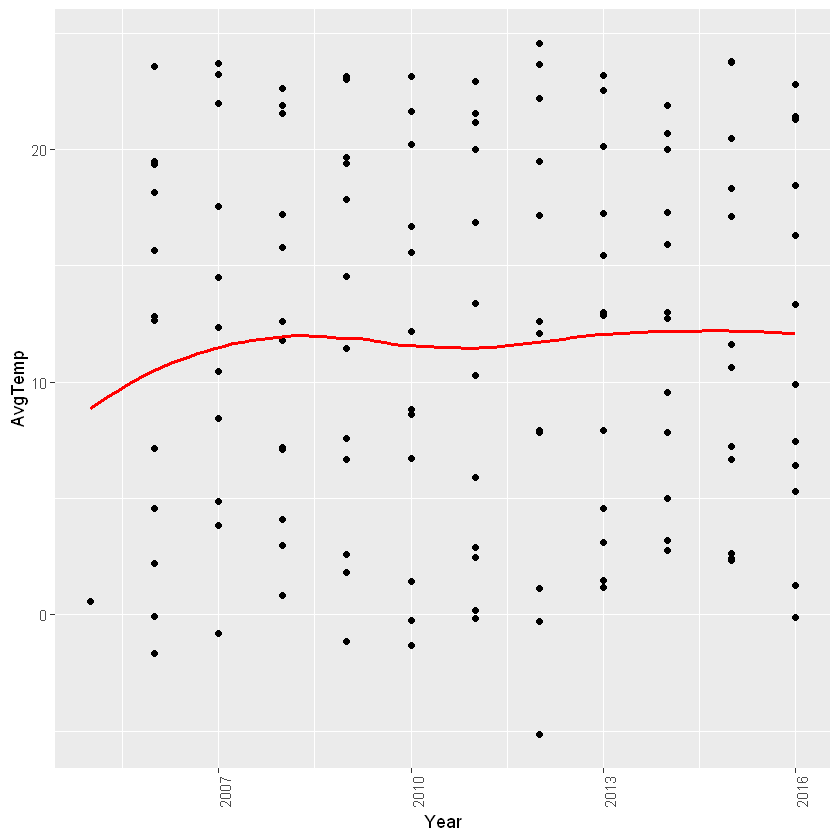

In [5]:
#Grouping monthly average temperature
monthly <- weatherdata %>% group_by(year(Date), month(Date)) %>% summarise(avgtemp = mean(Temperature..C.))
#Changing names of columns
names(monthly) <- c('Year' , 'Month' , 'AvgTemp')
#Merging two columns
monthly$Time <- paste(monthly$Year, monthly$Month)
#Plotting the dataset
ggplot(monthly , aes(Year, AvgTemp)) + 
    geom_point() +                                                     #Adding points
    theme(axis.text.x = element_text(angle = 90)) +                    #Rotating x axis ticks
 geom_smooth( color = 'red', se = F)                                   #Adding linear regression model line              


 To see the monthly change in temperature between 2006 to 2016. Let us create a parallel line linear regression model for the fist six months of the years and plot it. Upon careful visualisation,  we can observe that the average monthly temperature has increased from 2006 to 2016 significantly. 

(Intercept)                  Month       factor(Year)2016 
            -7.6293080              4.5824844              4.1430403 
Month:factor(Year)2016 
            -0.5043867

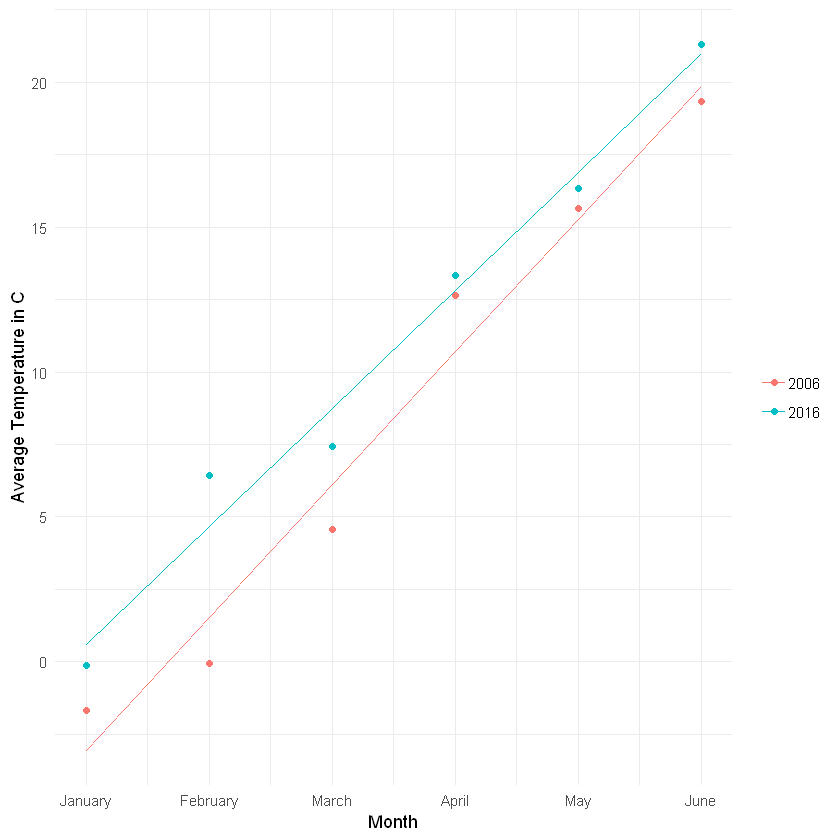

In [8]:
#Getting the data from 2006 and 2016 for the fist 6 months
wd0616 <- subset(weatherdata, subset = (year(Date) == 2006 | year(Date) == 2016) & month(Date) < 7,
                 select = c(Date ,Temperature..C.))
#Getting the monthly average temperature
monthly <- wd0616 %>% group_by(year(Date), month(Date)) %>% summarise(AvgTemp = mean(Temperature..C.))
#Changing column names 
names(monthly) <- c('Year' , 'Month' , 'AvgTemp')
#Creating a factor for the year column
monthly$Year <- factor(monthly$Year)
#Generating our parallel slop linear regression model
linear_model2 <- lm(AvgTemp ~ Month + factor(Year) + Month:factor(Year), data = monthly)
#Displaying the coeeficients of our model
coefficients(linear_model2)
#Augmenting the model
augmented_mod <- augment(linear_model2)

#Plotting the augmented model
ggplot(augmented_mod , aes(x = Month, y = AvgTemp, color = factor.Year.)) + 
    geom_point() +                                         #Adding points
    geom_line(aes(y = .fitted)) +                          #Adding regression lines through the fitted dataset
    labs(x = "Month" , y = "Average Temperature in C", fill = "Year" ) + 
    scale_x_continuous(breaks = seq(1,6,1), labels = c("January" , "February" , "March" , "April" , "May", "June")) +
    theme_minimal() +
    theme(legend.title = element_blank()) 
    
   
   

Let us divide our dataset into two parts. The first dataset - explanatory_data contains 80% of our data and second dataset which is our test dataset - actual_data contains the remaining 20% of our data. Based upon the temperature dataset from 2006 to 2014, we will create a model to predict annual average temperature. Using actual_data, we can validate our model. The scatterplot containing red points is the predicted annual temperature for 2015 and 2016. 

Year,Expected_Temperature
2015,12.18276
2016,12.24236


Year,Temperature
2015,12.31209
2016,11.98738


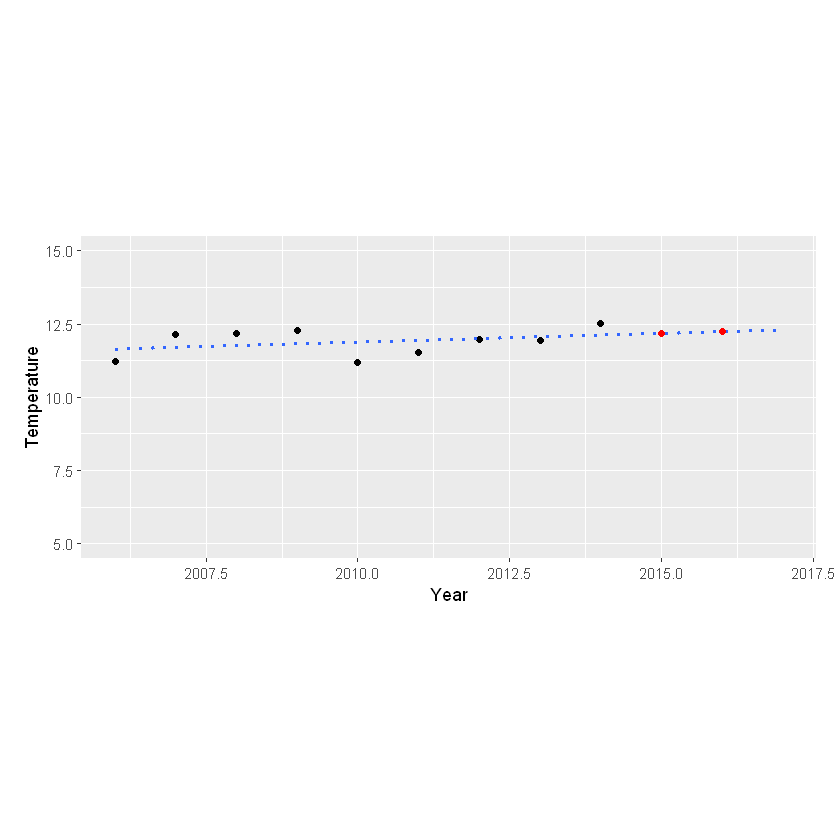

In [13]:
#Getting the first 80% of our dataset in explanatory_data
explanatory_data <- weatherdata %>% filter(year(Date) != 2016 & year(Date) != 2015 & year(Date) != 2005) %>% 
            group_by(Year = year(Date)) %>% summarize (Temperature = mean(Temperature..C.))

#Getting the test dataset in actual_data
actual_data <- weatherdata %>% filter(year(Date) == 2015 | year(Date) == 2016) %>% 
                group_by (Year = year(Date))  %>% 
                summarize (Temperature = mean(Temperature..C.))

#Generating a model based on Year
linear_model2 <- lm(Temperature ~ Year, data = explanatory_data)
#Creating a new dataframe
new_data <- data.frame(Year = c(2015,2016))

#Predicting the temperature based upon our model
predicted_data <- augment(linear_model2, newdata = new_data) 
colnames(predicted_data) <- c('Year' , "Expected_Temperature")
#Displaying the predicted dataset
predicted_data[-3]
#Displaying the test dataset
actual_data
#Plotting explanatory data
plot <- ggplot(explanatory_data, aes(x = Year, y = Temperature)) +
geom_point() +                                                                                     #Adding points
geom_smooth(method = 'lm', se = FALSE, linetype = 'dotted', fullrange = T) + ylim(5,15) +          #Adding a dotted regression line
theme(plot.margin = margin(5,.5,5,.5, "cm"))  + xlim(2006,2017)


plot + geom_point(data = predicted_data, aes(x = Year, y = Expected_Temperature), color = 'red')  #Plotting the predicted values

We can observe that our predictions are accurate having a percentage error of about 1.01%. Let us create another detailed model which can predict average monthly temperature using SARIMA modelling. The model used below, SARIMA(p=1,q=1,d=1,P=0,D=1,Q=1,S=12), predicts the monthly average temperature for the next 36 months or 3 years (depicted in red) with the gray region depicting a 95 % confidence interval.   

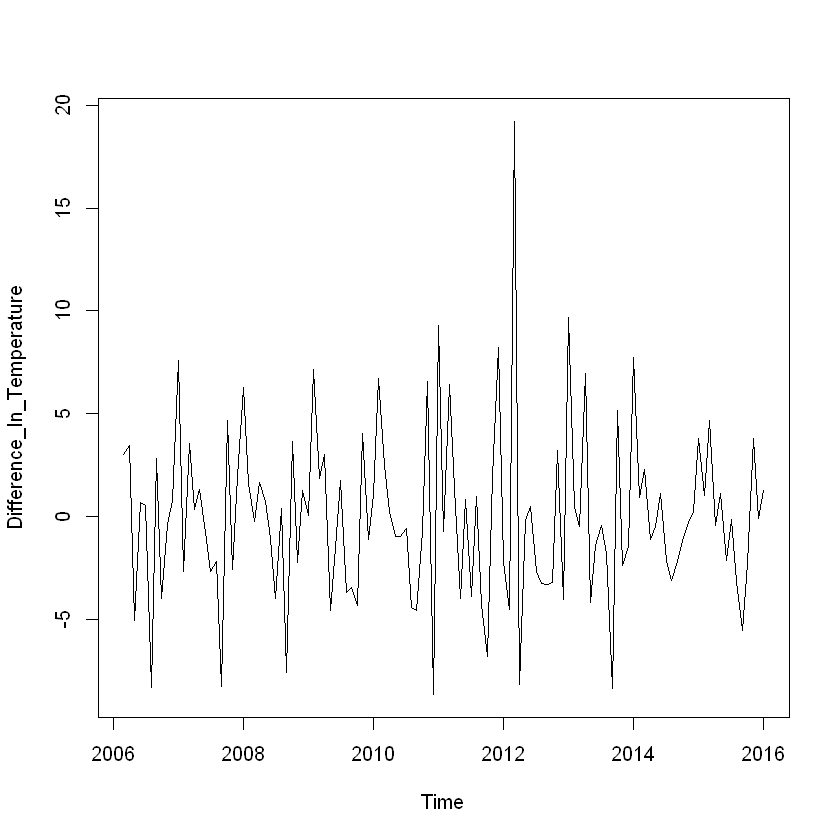

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,,1.800336,7.135708,13.141301,17.272943,21.043560,23.264576,22.695435,17.667906,11.874897,7.048442,1.876284
2017,1.275519,2.128162,7.255398,13.101512,17.318875,21.062356,23.353370,22.826833,17.776247,11.853748,7.091063,2.001408
2018,1.246862,2.171237,7.311217,13.159596,17.377360,21.120913,23.411940,22.885405,17.834819,11.912321,7.149635,2.059980
2019,1.305435,,,,,,,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,,1.714799,1.749573,1.752062,1.752390,1.752445,1.752454,1.752457,1.752462,1.752490,1.752641,1.753315
2017,1.751612,1.752714,1.752883,1.752912,1.752917,1.752918,1.752918,1.752919,1.752924,1.752953,1.753108,1.753833
2018,1.753232,1.764769,1.765984,1.766174,1.766207,1.766213,1.766214,1.766215,1.766221,1.766254,1.766432,1.767290
2019,1.767471,,,,,,,,,,,


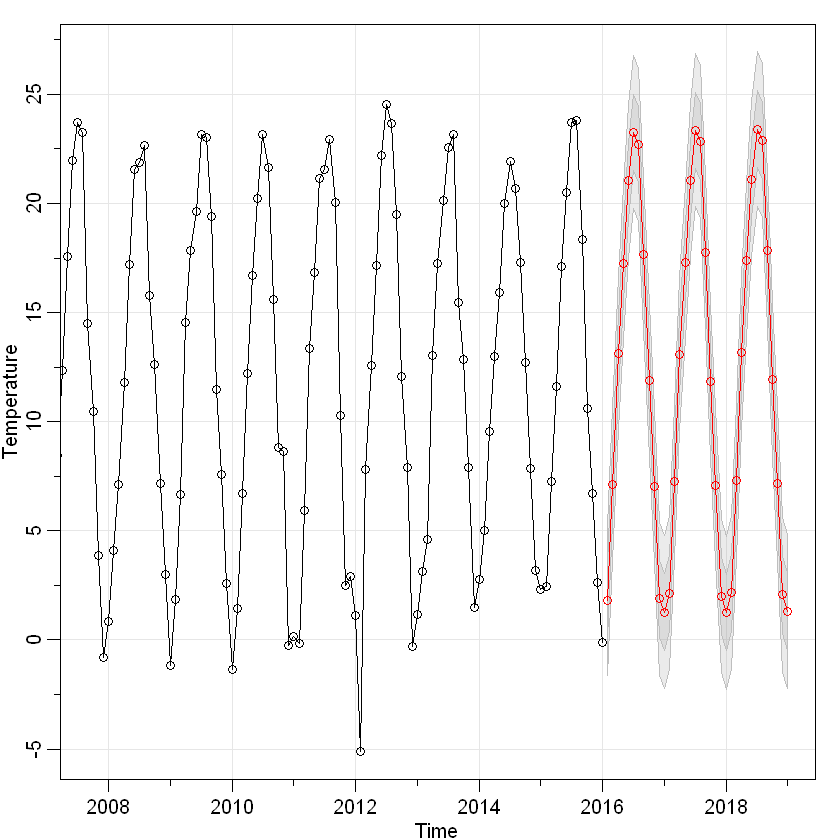

In [30]:
#Removing obscure data from 2005
wd<- weatherdata %>% filter(year(Date) != 2005)
MonthlyAvgTemp <- wd %>% group_by(Year = year(Date) , Month = month(Date)) %>% summarise ( Temperature = mean(Temperature..C.))
#Creating a time-series
Temperature <- ts(MonthlyAvgTemp[3] , start = 2006 , end = 2016, frequency = 12)
t <- diff(Temperature)
Difference_In_Temperature <- diff(t , lag.max = 12)
#Plotting the differenced temperature data with a cycle of 12 months
plot(Difference_In_Temperature)
#Generating a model to predict the monthly weather for the next 3 years
sarima.for(Temperature,1,1,1,0,1,2,12, n.ahead = 36)

Throughout this thorough analysis of the weather data, we have created several models which can be used for weather forecasting. We have also observed that there is a slight increase in annual average temperature from 2006 to 2016.